In [ ]:
from datetime import timedelta,date
import holidays
import pandas as pd
import random
import numpy as np

# Calendar Dataframe

def calendar(year,country='ES',subdiv=None):
    """
    returns a dataframe with three columns:
    dates: with format [YYYY-MM-DD], ascending
    weekend: with value 1 if it's Saturday or Sunday, otherwise it returns 0.
    holidays: with value 1 if it's public holidays, otherwise it returns 0.
    """
    calendar=pd.DataFrame()

    def daterange(year):
        calendar = pd.DataFrame()
        calendar['Dates']=pd.date_range(f'{year}-01-01', f'{year}-12-31', freq='D')
        return calendar

    calendario = daterange(year)

    def weekends(calendar):
        calendar['weekday']= calendar['Dates'].apply(lambda x: x.weekday())
        weekend = {0:0,1:0,2:0,3:0,4:0,5:1,6:1}
        calendar['Weekend'] = calendar['weekday'].map(weekend)
        calendar.drop(columns='weekday',inplace=True)
        return calendar

    calendario = weekends(calendario)

    def public_holidays(calendar):
        es_cl_holidays = holidays.country_holidays(country,subdiv)
        calendar['Holidays']=calendar['Dates'].apply(lambda x: x in es_cl_holidays).map(int)
        return calendar
    calendario = public_holidays(calendario)

    def times(calendario):
        times=['Evening','Night']
        for i in range(1,4):
            calendario[f'Morning_{i}']=pd.Series(0)
        for t in times:
            for n in range(1,3):
                calendario[f'{t}_{n}'] = pd.Series(0)
        return calendario
    calendario = times(calendario)
    calendario['Month'] = calendario['Dates'].apply(lambda x: x.strftime('%b'))
    calendario['Week Number'] = calendario['Dates'].dt.isocalendar().week
    month = calendario['Month'].unique()
    calendarios={}
    for i in month:
        calendarios[i]= calendario[calendario['Month']==i]
    calendarios['All']= calendario
    return calendarios
    
   

# def accounting(workers_df,calendar_df):
#     workers=list(workers_df['name'])
#     for i in workers:
#         calendar_df[f'{i} T.C.']=0
#         calendar_df[f'{i} W.C.']=0
#         calendar_df[f'{i} M.C.']=0
    


In [ ]:
calendario = calendar(2023,'ES','CL') ['All']

In [ ]:
calendario

In [ ]:
def load_employees(csv_file_path):
    data=pd.read_csv(csv_file_path,delimiter=';',header=0,index_col=False)
    return data

In [ ]:
data = load_employees('/Users/monic/code/monicasainer/calendar/raw_data/Project.csv')

In [ ]:
data

In [ ]:
def night_assignment(workers_df,calendar_df):
    worker_nights=list(workers_df[workers_df['schedule']==2]['name']) #Employees during night
    number_days = workers_df.shape[0] # Total nights in a year
    half_year,remain = divmod(number_days,2) #2 because night workers work half of the year. Some +1 day since the number is not even.
    half_year_remain = half_year + remain
    workers_half_year = random.sample(worker_nights,k=2) #Will work 182 días
    workers_half_year_remain = [worker for worker in worker_nights if worker not in workers_half_year] #Will work 183 días
    total_workers_type1 = half_year*workers_half_year
    total_workers_type2 = half_year_remain*workers_half_year_remain
    total_workers_annually = total_workers_type1+total_workers_type2 #list with the total number of occurences of each employee.
    first_worker = random.choices(worker_nights,k=1)[0] 
    print(f'workers working 182 days:{workers_half_year}')
    print(f'workers working 183 days:{workers_half_year_remain}')

    #Remove the worker from the corresponding list.
    if first_worker in workers_half_year:
        workers_half_year.remove(first_worker)
        second_worker = workers_half_year[0]
        third_worker = random.choices(workers_half_year_remain,k=1)[0]
        workers_half_year_remain.remove(third_worker)
        forth_worker = workers_half_year_remain[0]
    else:
        workers_half_year_remain.remove(first_worker)
        second_worker = workers_half_year_remain[0]
        third_worker = random.choices(workers_half_year,k=1)[0]
        workers_half_year.remove(third_worker)
        forth_worker = workers_half_year[0]

    #getting the month of vacation
    first_worker_vacation=workers_df[workers_df['name']==first_worker]['vacation'].tolist()[0]
    second_worker_vacation=workers_df[workers_df['name']==second_worker]['vacation'].tolist()[0]
    third_worker_vacation=workers_df[workers_df['name']==third_worker]['vacation'].tolist()[0]
    forth_worker_vacation=workers_df[workers_df['name']==forth_worker]['vacation'].tolist()[0]

    print(f'first_worker: {first_worker},second_worker: {second_worker},\
        third_worker:{third_worker},forth_worker:{forth_worker}')

    #getting the indexes of vacation
    indexes_vacation_first_worker = []
    for i in range(0,len(calendar_df)):
            if calendar_df.iloc[i]['Month']==first_worker_vacation:
                indexes_vacation_first_worker.append(i)
    if len(indexes_vacation_first_worker)==31:
        indexes_vacation_first_worker=indexes_vacation_first_worker[:-1]
            
    indexes_vacation_second_worker = []
    for i in range(0,len(calendar_df)):
        if calendar_df.iloc[i]['Month']==second_worker_vacation:
            indexes_vacation_second_worker.append(i)
    if len(indexes_vacation_second_worker)==31:
        indexes_vacation_second_worker=indexes_vacation_second_worker[:-1]

    indexes_vacation_third_worker = []
    for i in range(0,len(calendar_df)):
        if calendar_df.iloc[i]['Month']==third_worker_vacation:
            indexes_vacation_third_worker.append(i)
    if len(indexes_vacation_third_worker)==31:
        indexes_vacation_third_worker=indexes_vacation_third_worker[:-1]

    indexes_vacation_forth_worker = []
    for i in range(0,len(calendar_df)):
        if calendar_df.iloc[i]['Month']==forth_worker_vacation:
            indexes_vacation_forth_worker.append(i)
    if len(indexes_vacation_forth_worker)==31:
        indexes_vacation_forth_worker=indexes_vacation_forth_worker[:-1]

    print(f'vacation_first_worker: {len(indexes_vacation_first_worker)},vacation_second_worker:{len(indexes_vacation_second_worker)},vacation_third_worker:{len(indexes_vacation_third_worker)},vacation_forth_worker:{len(indexes_vacation_forth_worker)}')
    
    #Separating total indexed in 3 and 4.
    index_group_3=[]
    index_group_4_last_digits=[]
    for v in range(0,365,7):
        for t in range(v,v+3):
            index_group_3.append(t)
        for z in range (v+3,v+7):
            index_group_4_last_digits.append(z)
            
    #Dividing the groups of 3 into work and rest for first and second worker.
    index_work_first_group=[]
    index_rest_first_group=[]
    for i in range(3,len(index_group_3),6):
        index_work_first_group.append(index_group_3[i-3:i])
        index_rest_first_group.append(index_group_3[i:i+3])
    index_work_first_group=sum(index_work_first_group,[])
    index_rest_first_group=sum(index_rest_first_group,[])



    #Dividing the groups of 4 into work and rest, in pairs:first and second worker.
    index_work_temp=[]
    index_rest_temp=[]
    for t in range(2,len(index_group_4_last_digits),8):
        index_rest_temp.append(index_group_4_last_digits[t-2:t])
        index_work_temp.append(index_group_4_last_digits[t:t+2])
        index_work_temp.append(index_group_4_last_digits[t+2:t+4])
        index_rest_temp.append(index_group_4_last_digits[t+4:t+6])
    index_work_temp=sum(index_work_temp,[])
    index_rest_temp=sum(index_rest_temp,[])
    index_work_first_group=index_work_first_group+index_work_temp
    index_rest_first_group=index_rest_first_group+index_rest_temp



    index_work_second_group = index_rest_first_group
    index_rest_second_group = index_work_first_group
    

    #Sorting the indexes of each class.
    index_work_first_group = [x for x in index_work_first_group if x in list(range(len(calendar_df)))]
    index_work_first_group.sort()
    print(f'index_work_first_group:{len(index_work_first_group)}')

    index_work_second_group = [x for x in index_work_second_group if x in list(range(len(calendar_df)))]
    index_work_second_group.sort()
    print(f'index_work_second_group:{len(index_work_second_group)}')

    index_rest_first_group = [t for t in index_rest_first_group if t in list(range(len(calendar_df)))]
    index_rest_first_group.sort()
    print(f'index_rest_first_group:{len(index_rest_first_group)}')

    index_rest_second_group = [t for t in index_rest_second_group if t in list(range(len(calendar_df)))]
    index_rest_second_group.sort()
    print(f'index_rest_second_group:{len(index_rest_second_group)}')

    # Adding an extra day of work, if the employee works 183 days.
    total_first_group = list(index_work_first_group + index_rest_first_group)
    df_calendar_index= list(range(0,len(calendar_df)))
    if (first_worker and second_worker) in workers_half_year_remain:
        missing_index =[x for x in df_calendar_index if x not in total_first_group]
        index_work_first_group.append(missing_index[0])
    else:
        missing_index =[x for x in df_calendar_index if x not in total_first_group]
        index_work_second_group.append(missing_index[0])

    print(f'total work indexes first and second worker :{len(index_work_first_group)}') #first and second worker
    print(f'total work indexes third and forth worker:{len(index_work_second_group)}') #third and forth worker


    # Checking the conflict between work indexes and vacation indexes:first worker
    conflicting_days_first_worker =[f for f in index_work_first_group if f in indexes_vacation_first_worker]
    print(f'first conflicting days first worker: {conflicting_days_first_worker[0]}')
    print(f'index first conflicting days in first_group_work_index: {index_work_first_group.index(conflicting_days_first_worker[0])}')
    print(f'prior index to first conflicting days in first_group_work_index: {index_work_first_group.index(conflicting_days_first_worker[0])-1}')
    print(f'first_group_first_worker_prior_index: {index_work_first_group[index_work_first_group.index(conflicting_days_first_worker[0])-1]}')

    print(f'length conflicting days first worker: {len(conflicting_days_first_worker)}')
    if (len(conflicting_days_first_worker)) < 15:
        new_index_to_include = index_work_first_group.index(conflicting_days_first_worker[0])-1
        print (new_index_to_include)
        #calendar_df['Night_1'].iloc[new_index_to_include]='Externo'
        for f in index_work_first_group:
            if f not in conflicting_days_first_worker and f != new_index_to_include:
                calendar_df['Night_1'].iloc[int(f)] = first_worker
            else: calendar_df['Night_1'].iloc[int(f)] = 'Externo'
        # calendar_df['Night_1'].iloc[new_index_to_include].replace(first_worker,'Externo')
    else:
        for f in index_work_first_group:
            if f not in conflicting_days_first_worker:
                calendar_df['Night_1'].iloc[int(f)] = first_worker
            else: calendar_df['Night_1'].iloc[int(f)] = 'Externo'


    # Checking the conflict between work indexes and vacation indexes: second worker
    conflicting_days_second_worker =[k for k in index_work_first_group if k in indexes_vacation_second_worker ]
    print(f'length conflicting days second worker: {len(conflicting_days_second_worker)}')
    if (len(conflicting_days_second_worker)) < 15:
        new_index_to_include = index_work_first_group.index(conflicting_days_second_worker[0])-1
        print (new_index_to_include)
        #calendar_df['Night_2'].iloc[new_index_to_include]='Externo'
        for f in index_work_first_group:
            if f not in conflicting_days_second_worker and f!= new_index_to_include:
                calendar_df['Night_2'].iloc[int(f)] = second_worker
            else: calendar_df['Night_2'].iloc[int(f)] = 'Externo'
        
    else:
        for f in index_work_first_group:
            if f not in conflicting_days_second_worker:
                calendar_df['Night_2'].iloc[int(f)] = second_worker
            else: calendar_df['Night_2'].iloc[int(f)] = 'Externo'


    # Checking the conflict between work indexes and vacation indexes:third worker
    conflicting_days_third_worker =[n for n in indexes_vacation_third_worker if n in index_work_second_group]
    print(f'length conflicting days third worker: {len(conflicting_days_third_worker)}')
    if (len(conflicting_days_third_worker)) < 15:
        new_index_to_include = index_work_second_group.index(conflicting_days_third_worker[0])-1
        print (new_index_to_include)
        #calendar_df['Night_1'].iloc[new_index_to_include]='Externo'
        for f in index_work_second_group:
            if f not in conflicting_days_third_worker and f!= new_index_to_include:
                calendar_df['Night_1'].iloc[int(f)] = third_worker
            else: calendar_df['Night_1'].iloc[int(f)] = 'Externo'
        
    else:
        for f in index_work_second_group:
            if f not in conflicting_days_third_worker:
                calendar_df['Night_1'].iloc[int(f)] = third_worker
            else: calendar_df['Night_1'].iloc[int(f)] = 'Externo'

    # Checking the conflict between work indexes and vacation indexes:forth worker
    conflicting_days_forth_worker =[j for j in indexes_vacation_forth_worker if j in index_work_second_group]
    
    print(f'length conflicting days forth worker: {len(conflicting_days_forth_worker)}')
    if (len(conflicting_days_forth_worker)) < 15:
        new_index_to_include = index_work_second_group.index(conflicting_days_forth_worker[0])-1
        print (new_index_to_include)
        for f in index_work_second_group:
            if f not in conflicting_days_forth_worker and f != new_index_to_include:
                calendar_df['Night_2'].iloc[int(f)] = forth_worker
            else: calendar_df['Night_2'].iloc[int(f)] = 'Externo'
        
    else:
        for f in index_work_second_group:
            if f not in conflicting_days_forth_worker:
                calendar_df['Night_2'].iloc[int(f)] = forth_worker
            else: calendar_df['Night_2'].iloc[int(f)] = 'Externo'
    
    return calendar_df

In [ ]:
calendario = night_assignment(data,calendario)

In [ ]:
calendario['Night_1'].value_counts()

In [ ]:
calendario['Night_2'].value_counts()

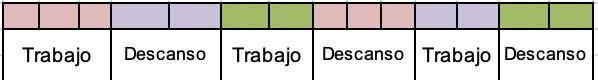